# <b>Digital Recognition Notebook</b>

In this notebook we will look into digit recognition with the keras plug-in. We will use the MNIST data set to first train the neural network and then we will input out own image to see if it will recognise that. With this we hope that it will recognise the digit correctly and display the results to the user.

## Setting up the Neural Network

To set up the initial neural network, we'll need to use the numpy package that we've used before to store the data into an array. We also need to import the keras package to create the network.

#### Keras
Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research. [1]

#### Creating neural network
The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the Sequential model, a linear stack of layers. With this, we then add layers onto the model and configure its learning process with a compile. [2]

In [9]:
# import keras packages
# NOTE: To import the keras package you must install tensorflow - which can be found here: https://www.tensorflow.org/install/
import keras as kr

# Create the sequential model
model = kr.models.Sequential()

# Add layers to the model
model.add(kr.layers.Dense(units=1000, activation='linear', input_dim=784))
model.add(kr.layers.Dense(units=400, activation='relu'))
model.add(kr.layers.Dense(units=10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

We set up an input layer of 784 neurons, one for each value in the 28x28 array, with a hidden layer of 1000 neurons and a linear activation function.
(NOTE: the below graph shows a 100 neuron hidden layer whereas we are using a 1000 neuron hidden layer).

We set up an output layer with 10 neurons, one for each value ranging from 0-9.

<img src="https://3.bp.blogspot.com/-mDyzBzA4btg/V4_Z0f2mc7I/AAAAAAAAE3M/dtU8hT661fQWtnRC_JvIH_4qifQomZ4PACLcB/s1600/MNIST_neuralnet_image.png">
[3]

## Importing the dataset

Now that we have our neural network set up, we can import the MNIST data set so we can train our neural network. As we've done before in the MNIST notebook, we just import the gzip package to open the data set files, and store these byte values into an int array using numpy.

In [2]:
# Import the gzip and numpy packages
import gzip
import numpy as np

# This opens the images file which is located in our local directory and assigns the read in value to a variable
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    image_content = f.read()
    
# This opens the label file which is located in our local directory and assigns the read in value to a variable
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    label_content = f.read()
    
# This opens the training images file which is located in our local directory and assigns the read in value to a variable
with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

# This opens the training label file which is located in our local directory and assigns the read in value to a variable
with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()
    
# Assign the training data set to a numpy array holding all the values in a 28x28 array
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8) / 255.0
# Assign the training label data set to a numpy array
train_lbl =  np.array(list(train_lbl[8:])).astype(np.uint8)

Now that we have the training set assigned to an array, we can also assign the test set to an array. Below I will also show the bytes as 1s and 0s as an array.

In [3]:
# Assign the data set to a numpy array holding all the values in a 28x28 array
image_test = ~np.array(list(image_content[16:])).reshape(10000,28,28).astype(np.uint8)

# Assign the label data set to a numpy array
label_test =  np.array(list(label_content[8:])).astype(np.uint8)

# Display the bytes as 1s and 0s in an array
print((~image_test[0]).astype(np.bool).astype(np.uint8))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 

## Flattening the array
With our training array with a size of 60000 with a 28x28 array at each of these values we have a 3 Dimensional array. But to input our values into the neural network we need a 1 Dimensional array were all the values are sequentially stored after eachother. To do this, we just need to reshape the array again to the size we want.

In [4]:
# Reshape the 3D array into a 1D array
inputs = train_img.reshape(60000, 784)
# Print the 1D array of inputs
print(inputs)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


## Encoding the label data
The label data needs to be encoded into a matrix of 10x10. To do this we convert the data into binary format. So first we set up the binary encoder, then pass in the label values and fit them into the matrix as the label values are 0-9 so they fit into the 10x10 matrix. The labels are then transformed into the binary format, where each label number indicates the value of the number and the binary format displays its position.

In [5]:
# For encoding categorical variables.
import sklearn.preprocessing as pre

# set up the binary encoder
encoder = pre.LabelBinarizer()
# fit the labels into the binary format
encoder.fit(train_lbl)
# Transform the labels to the binary format
outputs = encoder.transform(train_lbl)

# Print the labels position and the binary array in the same position
# Result should show the label number 5 and a 1 in the 6th position to indicate the number 5 (0-9)
print(train_lbl[19], outputs[19])

9 [0 0 0 0 0 0 0 0 0 1]


In [6]:
for i in range(10):
    print(i, encoder.transform([i]))

0 [[1 0 0 0 0 0 0 0 0 0]]
1 [[0 1 0 0 0 0 0 0 0 0]]
2 [[0 0 1 0 0 0 0 0 0 0]]
3 [[0 0 0 1 0 0 0 0 0 0]]
4 [[0 0 0 0 1 0 0 0 0 0]]
5 [[0 0 0 0 0 1 0 0 0 0]]
6 [[0 0 0 0 0 0 1 0 0 0]]
7 [[0 0 0 0 0 0 0 1 0 0]]
8 [[0 0 0 0 0 0 0 0 1 0]]
9 [[0 0 0 0 0 0 0 0 0 1]]


Now to train our neural network, we need to train it. To do this we use the keras fit() method which will train  the model for a given number of epochs (iterations on a dataset). [4]

For our model we are going to pass in four parameters:
    <li>Inputs:    
    Numpy array of training data.
    </li>
    <li>Outputs:      
    Numpy array of label data
    </li>
    <li>Epoch:      
    Number of epochs to train the model. An epoch is an 
    iteration over the entire x and y data provided. </li>
    <li>Batch_size:       
    The amount of data we want to test at one time.
    </li>
    
    
For the below example, we will use the training set that we set up above. We will have a batch size of 100 and an epoch size of 2. With our batch size quite large and such a small epoch size we dont expect to have a high accuracy as we are not training the model enough.

In [7]:
model.fit(inputs, outputs, epochs=2, batch_size=100)

Epoch 1/2
60000/60000 [==============================] - 16s 264us/step - loss: 0.7713 - acc: 0.7814
Epoch 2/2
60000/60000 [==============================] - 16s 262us/step - loss: 0.4014 - acc: 0.8845


With the above example working we can work with a bigger epoch size to get better accuracy with our results. We can also use the Matplotlib package to graph our results and see how more accurate the neural network gets every iteration (epoch).

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 14s 306us/step - loss: 0.8567 - acc: 0.7572 - val_loss: 0.5220 - val_acc: 0.8415
Epoch 2/20
45000/45000 [==============================] - 14s 313us/step - loss: 0.4341 - acc: 0.8754 - val_loss: 0.3614 - val_acc: 0.8975
Epoch 3/20
45000/45000 [==============================] - 14s 309us/step - loss: 0.3749 - acc: 0.8921 - val_loss: 0.3411 - val_acc: 0.9013
Epoch 4/20
45000/45000 [==============================] - 13s 282us/step - loss: 0.3443 - acc: 0.8987 - val_loss: 0.3390 - val_acc: 0.8986
Epoch 5/20
45000/45000 [==============================] - 13s 284us/step - loss: 0.3228 - acc: 0.9051 - val_loss: 0.2987 - val_acc: 0.9145
Epoch 6/20
45000/45000 [==============================] - 13s 281us/step - loss: 0.3055 - acc: 0.9113 - val_loss: 0.3045 - val_acc: 0.9089
Epoch 7/20
45000/45000 [==============================] - 13s 281us/step - loss: 0.2915 - acc: 0.9148 - val_loss: 0.

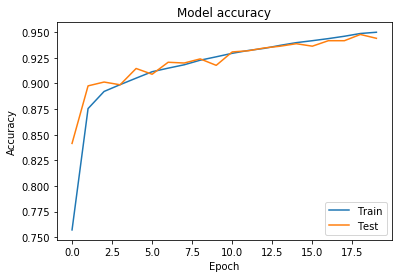

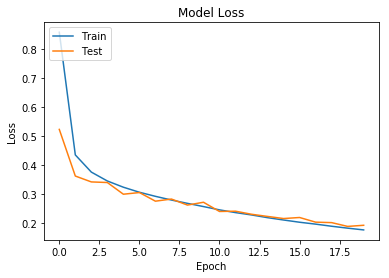

In [10]:
# Import the matplotlib package
import matplotlib.pyplot as plt

# Train the model and assign it to a variable so we can use it to plot our data
training = model.fit(inputs, outputs, epochs=20, validation_split=0.25, batch_size=100, verbose=1)

#NOTE: If graph doesnt show after first run, rerun the initial model set up at the top and rerun this block again

# Plot training & validation accuracy values
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Uploading an image

With the model trained we can now upload our own image file and test it against our neural network. We can use TkInter to upload the photo we want. Tkinter is a Python binding to the Tk GUI toolkit so we can use the GUI to upload our image [5]. Below code is adapted from <a href="https://stackoverflow.com/questions/9319317/quick-and-easy-file-dialog-in-python">here</a>. 

In [12]:
# Import image from keras to load in the image, and TkInter for locating the image you wish to upload
from keras.preprocessing import image
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()
# Open the GUI for the user to select an image
file_path = filedialog.askopenfilename()
# Convert image to prefered size
uploaded_image = image.load_img(path=file_path,color_mode = "grayscale",target_size=(28,28,1))
# Convert image into numpy array
img_data = np.array(list(image.img_to_array(uploaded_image))).reshape(1, 784).astype(np.uint8) / 255.0
# Predict the number on the image
img_predict = model.predict(img_data)
# Print prediction
print("Nerual networks prediction: ", img_predict.argmax(axis=1))

Nerual networks prediction:  [7]


## Running the python file

To run the python file just execute the below line of code. This is a full program of what I have shown above with menu options 1-5 of things the user can do with the neural network:

<ul>
    <li>1: Test 10 random images from the test set.</li>
    <li>2: Test a given number of random images from the test set.</li>
    <li>3: Retrain the neural network.</li>
    <li>4: Retrain the neural network with your own epoch and batch_size values.</li>
    <li>5: Upload an image to be recognised.</li>
</ul>

In [ ]:
%run -i "Digit-Recog.py"

Epoch 1/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.7919 - acc: 0.7776
Epoch 2/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.4350 - acc: 0.8778
Epoch 3/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.3847 - acc: 0.8905
Epoch 4/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.3594 - acc: 0.8963
Epoch 5/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.3441 - acc: 0.9011
Epoch 6/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.3352 - acc: 0.9032
Epoch 7/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.3272 - acc: 0.9053
Epoch 8/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.3208 - acc: 0.9076
Epoch 9/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.3161 - acc: 0.9093
Epoch 10/20
60000/60000 [==============================] - 10s 173us/step - loss: 

Please Select a menu option: 
1 - Test 10 random images from the test set. 
2 - Test a given number of random images from the test set. 
3 - Retrain the neural network. 
4 - Retrain the neural network with your own epoch and batch_size values. 
5 - Upload an image to be recognised. 
-1 to exit 1


Test Number :  1
Index in dataset (Randomly generated):  6277
The networks prediction: ====>  [5]
The actual number: ====>  [5]
--------------------------------------------

Test Number :  2
Index in dataset (Randomly generated):  3007
The networks prediction: ====>  [5]
The actual number: ====>  [5]
--------------------------------------------

Test Number :  3
Index in dataset (Randomly generated):  2085
The networks prediction: ====>  [2]
The actual number: ====>  [2]
--------------------------------------------

Test Number :  4
Index in dataset (Randomly generated):  350
The networks prediction: ====>  [1]
The actual number: ====>  [1]
--------------------------------------------

Test Number :  5
Index in dataset (Randomly generated):  7482
The networks prediction: ====>  [2]
The actual number: ====>  [2]
--------------------------------------------

Test Number :  6
Index in dataset (Randomly generated):  3548
The networks prediction: ====>  [3]
The actual number: ====>  [3]
---


Please Select a menu option: 
1 - Test 10 random images from the test set. 
2 - Test a given number of random images from the test set. 
3 - Retrain the neural network. 
4 - Retrain the neural network with your own epoch and batch_size values. 
5 - Upload an image to be recognised. 
-1 to exit 2
Enter the amount of numbers you wish to test: 5


Test Number :  1
Index in dataset (Randomly generated):  1011
The networks prediction: ====>  [1]
The actual number: ====>  [1]
Correct!
--------------------------------------------

Test Number :  2
Index in dataset (Randomly generated):  9352
The networks prediction: ====>  [0]
The actual number: ====>  [0]
Correct!
--------------------------------------------

Test Number :  3
Index in dataset (Randomly generated):  3611
The networks prediction: ====>  [2]
The actual number: ====>  [2]
Correct!
--------------------------------------------

Test Number :  4
Index in dataset (Randomly generated):  7098
The networks prediction: ====>  [7]
The actual number: ====>  [7]
Correct!
--------------------------------------------

Test Number :  5
Index in dataset (Randomly generated):  9068
The networks prediction: ====>  [8]
The actual number: ====>  [8]
Correct!
--------------------------------------------




Please Select a menu option: 
1 - Test 10 random images from the test set. 
2 - Test a given number of random images from the test set. 
3 - Retrain the neural network. 
4 - Retrain the neural network with your own epoch and batch_size values. 
5 - Upload an image to be recognised. 
-1 to exit 3


Epoch 1/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.2898 - acc: 0.9179
Epoch 2/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.2881 - acc: 0.9178
Epoch 3/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.2865 - acc: 0.9186
Epoch 4/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.2862 - acc: 0.9181
Epoch 5/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.2854 - acc: 0.9193
Epoch 6/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.2849 - acc: 0.9185
Epoch 7/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.2833 - acc: 0.9200
Epoch 8/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.2822 - acc: 0.9204
Epoch 9/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.2815 - acc: 0.9209
Epoch 10/20
60000/60000 [==============================] - 10s 168us/step - loss: 


Please Select a menu option: 
1 - Test 10 random images from the test set. 
2 - Test a given number of random images from the test set. 
3 - Retrain the neural network. 
4 - Retrain the neural network with your own epoch and batch_size values. 
5 - Upload an image to be recognised. 
-1 to exit 4
Enter the number of iterations:  2
Enter a Batch Size:  1000


Epoch 1/2
60000/60000 [==============================] - 5s 80us/step - loss: 0.2649 - acc: 0.9266
Epoch 2/2
60000/60000 [==============================] - 5s 80us/step - loss: 0.2646 - acc: 0.9260



Please Select a menu option: 
1 - Test 10 random images from the test set. 
2 - Test a given number of random images from the test set. 
3 - Retrain the neural network. 
4 - Retrain the neural network with your own epoch and batch_size values. 
5 - Upload an image to be recognised. 
-1 to exit 5


Nerual networks prediction:  [7]


## References
<ul>
    <li><a href="https://keras.io/">Keras Documentation</a> [1]</li>
    <li><a href="https://keras.io/#getting-started-30-seconds-to-keras">Keras Getting started</a> [2]</li>
    <li><a href="http://db-blog.web.cern.ch/fr/node/98">Neural Network Visual</a> [3]</li>
    <li><a href="https://keras.io/models/sequential/">Keras Sequential model API</a> [4]</li>
    <li><a href="https://en.wikipedia.org/wiki/Tkinter">TkInter Wiki</a> [5]</li>
</ul>